# Deteccion de estrés a partir de los tweets

Es un conjunto de datos para la clasificacion del estrés a partir de los tweets basados en texto 

Junto a cada uno de los textos hay una etiqueta de clase con valor de "0" o "1", donde **0 especifica estres negativo y 1 especifica estres positivo** 

**Librerias utilizadas**


In [1]:
import pandas as pd

from plotly import express

import nltk
import numpy as np


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


**Cargando los datos**


In [2]:
path="/home/pedrin/Escritorio/Proyecto/clasificacion/data/Twitter_Full.csv"
col=["text","labels"]
df = pd.read_csv(filepath_or_buffer=path, sep=';', usecols=col)

#new_names= {"text": "texto", "labels": "etiqueta"} #el texto del tweet y la etiqueta 0: estres negativo; 1: estres positivo
#df = df.rename(columns=new_names)



df.head()



,text,labels
0,Being s mom is cleaning 24/7 the same shit ove...,1
1,And now we have been given the walkthru book b...,0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0
3,speak-no-evil monkey Can I Be Honest With You...,1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0


In [3]:
print(df.shape)

(8900, 2)


Visualizando los dato, podemos ver que hay mas gente con estres o **estres positivo**

In [4]:

express.pie(data_frame=df, names="labels", color="text")
#podemos ver que haay mas personas con estres positivo



**Histograma de las longitudes de los textos**

In [5]:
express.histogram(x=df['text'].str.len(), log_y=True)

**Observamos si hay valores faltantes**

In [6]:
df.info()


df.isnull().sum()

#hay 3 campos de texto vacios


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8900 entries, 0 to 8899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8897 non-null   object
 1   labels  8900 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 139.2+ KB


text      3
labels    0
dtype: int64

In [7]:
df.fillna('missing', inplace=True) #se reemplazan los valores vacios con la cadena "missing" en el df original
df.dropna(inplace=True) 

In [8]:
df.count() #se han agregado los campos de texto, los valores estan a la par

text      8900
labels    8900
dtype: int64

# Con ayuda del vectorizador TF-IDF


FRECUENCIA DEL TERMINO - FRECUENCIA INVERSA DEL DOCUMENTO (TF - IDF) 

TF: Se mide la frecuencia de una palabra; cuantas mas veces aparezca una palabra, su relevancia sera mayor

IDF: Se mide la importancia de una palabra; las palabras que aparecen muchas veces, tienen menos importancia

In [9]:
#X=['text']
#y=['labels']

X_train, X_test, y_train, y_test = train_test_split(df["text"], df["labels"], test_size=0.2)


In [10]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Modelos

## Regresion logistica

Etapa 1

In [11]:
LR_clf = LogisticRegression()
LR_clf.fit(X_train_tfidf, y_train)


LogisticRegression()

In [12]:
y_pred_lr_test = LR_clf.predict(X_test_tfidf) #test
report_lr_test=classification_report(y_test, y_pred_lr_test)
mat_conf_lr_test= pd.DataFrame(confusion_matrix(y_test, y_pred_lr_test))
print("reporte conjunto de test:\n", report_lr_test)


reporte conjunto de test:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       882
           1       0.81      0.88      0.84       898

    accuracy                           0.84      1780
   macro avg       0.84      0.84      0.84      1780
weighted avg       0.84      0.84      0.84      1780



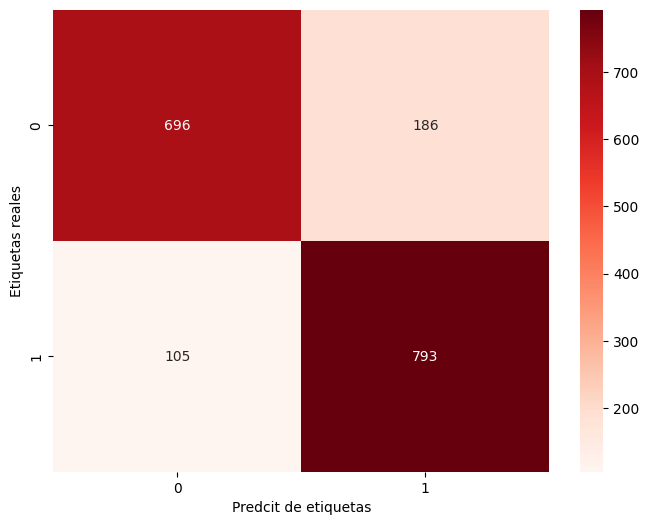

In [13]:
plt.figure(figsize=(8, 6)) #matriz del test

sns.heatmap(mat_conf_lr_test, annot=True, cmap='Reds', fmt='g')


plt.xlabel('Predcit de etiquetas')
plt.ylabel('Etiquetas reales')
plt.show()




Etapa 2

In [14]:
#mejor modelo
best_LR = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', C=25))  # modelo de regresion logistica
])
best_LR.fit(X_train, y_train)




Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 LogisticRegression(C=25, penalty='l1', solver='liblinear'))])

In [15]:
y_pred_test=best_LR.predict(X_test) #test
precision_lr_test = precision_score(y_test, y_pred_test)
recall_lr_test = recall_score(y_test, y_pred_test)
f1_lr_test = f1_score(y_test, y_pred_test)
matriz_conf_test= confusion_matrix(y_test, y_pred_test)

print("reporte del conjunto de test:")
print("precision: ", precision_lr_test)
print("recall: ", recall_lr_test)
print("f1: ", f1_lr_test)

reporte del conjunto de test:
precision:  0.8316831683168316
recall:  0.8418708240534521
f1:  0.8367459878251245


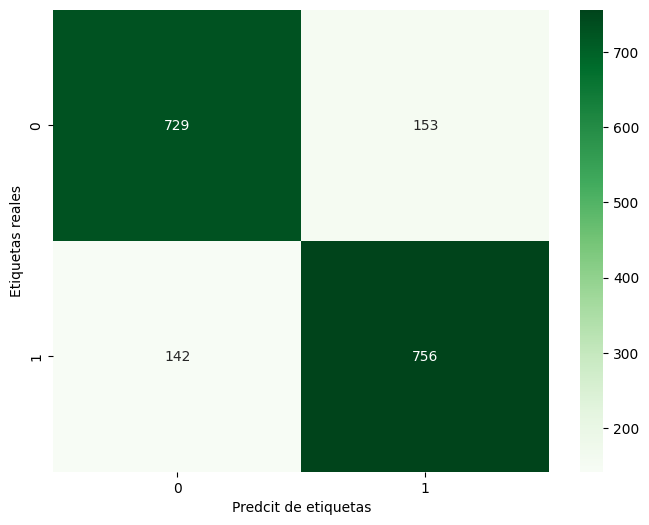

In [16]:

plt.figure(figsize=(8, 6)) #matriz del test

sns.heatmap(matriz_conf_test, annot=True, cmap='Greens', fmt='g')

plt.xlabel('Predcit de etiquetas')
plt.ylabel('Etiquetas reales')
plt.show()



Test

# Maquinas de soporte vectorial

Etapa 1

In [17]:

svm= SVC()  
svm.fit(X_train_tfidf, y_train)


SVC()

In [18]:
y_pred_svm = svm.predict(X_test_tfidf)#test
rep_svm=classification_report(y_test, y_pred_svm)
matriz_svm=confusion_matrix(y_test, y_pred_svm)
print("reporte:\n", rep_svm)

reporte:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       882
           1       0.81      0.90      0.85       898

    accuracy                           0.84      1780
   macro avg       0.85      0.84      0.84      1780
weighted avg       0.85      0.84      0.84      1780



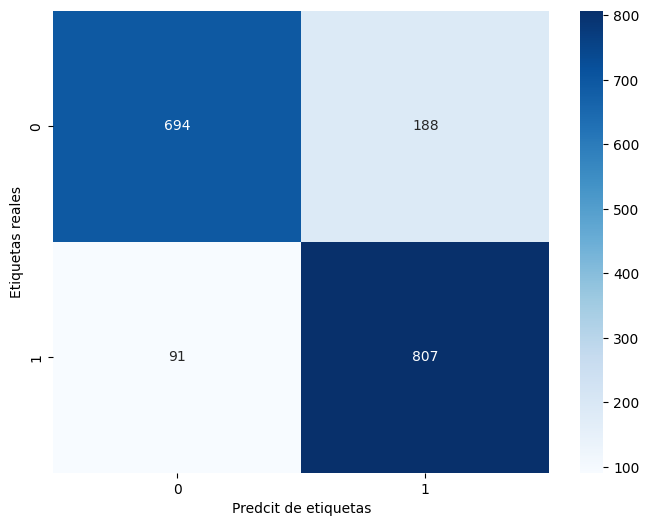

In [19]:
plt.figure(figsize=(8, 6))

sns.heatmap(matriz_svm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predcit de etiquetas')
plt.ylabel('Etiquetas reales')
plt.show()


Etapa 2 <br> Nos ayudaremos de un GridSearch para encontrar los mejores parametros

In [20]:


param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'poly', 'rbf'],  
    'gamma': ['scale', 'auto'] 
}


svm_clf = SVC()
grid = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy',n_jobs = -1)
grid.fit(X_train_tfidf, y_train)


best_params = grid.best_params_
print("Mejores hiperparámetros:", best_params)


best_model = grid.best_estimator_
y_pred_svm = best_model.predict(X_test_tfidf)



Mejores hiperparámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [21]:

best_svm = SVC(kernel='rbf', C=100, gamma='scale') #parametros obtenido del GS
best_svm.fit(X_train_tfidf, y_train)



SVC(C=100)

In [22]:
y_pred_best = best_svm.predict(X_test_tfidf) #test
precision_svm = precision_score(y_test, y_pred_best)
recall_svm = recall_score(y_test, y_pred_best)
f1_svm = f1_score(y_test, y_pred_best)
best_matrix=confusion_matrix(y_test, y_pred_best)

print("reporte:")
print("precision: ", precision_svm)
print("recall: ", recall_svm)
print("f1: ", f1_svm)

reporte:
precision:  0.8259958071278826
recall:  0.8775055679287305
f1:  0.8509719222462203


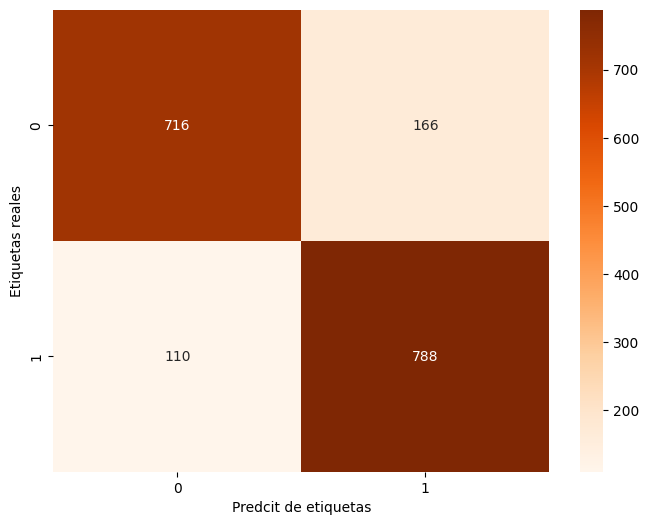

In [23]:


plt.figure(figsize=(8, 6))

sns.heatmap(best_matrix, annot=True, cmap='Oranges', fmt='g')

plt.xlabel('Predcit de etiquetas')
plt.ylabel('Etiquetas reales')
plt.show()

# Poniendo a prueba

In [24]:
#Regresion lineal
post="need a cup of coffe"
post_tfdif=tfidf_vectorizer.transform([post])
predict=LR_clf.predict(post_tfdif)
print("estres: ", predict[0])


post2="thanks for the beer"
post_tfdif=tfidf_vectorizer.transform([post2])
predict2=LR_clf.predict(post_tfdif)
print("estres: ", predict2[0])


estres:  1
estres:  0


In [25]:
#SVM
pub="need cry at this moment"
pub_tfdif=tfidf_vectorizer.transform([pub])
prediction=best_svm.predict(pub_tfdif)
print("estres: ", prediction[0])


pub2="thanks, great service"
pub_tfdif2=tfidf_vectorizer.transform([pub2])
prediction2=best_svm.predict(pub_tfdif2)
print("estres: ", prediction2[0])

estres:  1
estres:  0


# Comparaciones

In [26]:
metricas_clasificacion = {
    "Modelo": [
        "SVM ", 
        "Regresión Logística"
    ],
    "Precision": [
        precision_svm, 
        precision_lr_test
    ],
    "Recall": [
        recall_svm, 
        recall_lr_test
    ],
    "F1-Score": [
        f1_svm, 
        f1_lr_test
    ]
}

df_metricas_clasificacion = pd.DataFrame(metricas_clasificacion)
df_metricas_clasificacion

,Modelo,Precision,Recall,F1-Score
0,SVM,0.825996,0.877506,0.850972
1,Regresión Logística,0.831683,0.841871,0.836746
